<a href="https://colab.research.google.com/github/gurpreetsahotasingh288-gif/Python_program/blob/main/Blinkit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df=pd.read_csv("/content/blinkit_data.csv")
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [7]:
df.shape

(8523, 12)

In [8]:
df.dtypes


,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


In [9]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [10]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [12]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [13]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


KPI'S REQUIREMENT

BUSINESS REQUIRMENT

In [14]:
#total sales
df['Sales'].sum()

np.float64(1201681.4808)

In [15]:
#Average Sales
Average_sales=df['Sales'].mean()
Average_sales

np.float64(140.9927819781767)

In [16]:
#No. of items sold
no_of_items_sold=df['Sales'].count()
no_of_items_sold

np.int64(8523)

In [17]:
#Average rating
Average_Rating=df['Rating'].mean()
Average_Rating

np.float64(3.965857092573038)

**CHART REQUIREMENTS**

**TOTAL SALES BY FAT CONTENT**

In [18]:
sales_by_fat=df.groupby("Item Fat Content")['Sales'].sum()
sales_by_fat

,Sales
Item Fat Content,
Low Fat,776319.6784
Regular,425361.8024


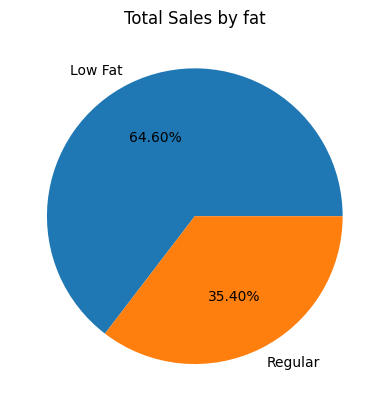

In [19]:
plt.pie(sales_by_fat,labels=sales_by_fat.index,autopct='%1.2f%%')
plt.title('Total Sales by fat')
plt.show()

**TOTAL SALES BY ITEM TYPE**

In [20]:
sales_by_type=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
sales_by_type

,Sales
Item Type,
Fruits and Vegetables,178124.0810
Snack Foods,175433.9204
Household,135976.5254
Frozen Foods,118558.8814
Dairy,101276.4596
Canned,90706.7270
Baking Goods,81894.7364
Health and Hygiene,68025.8388
Meat,59449.8638


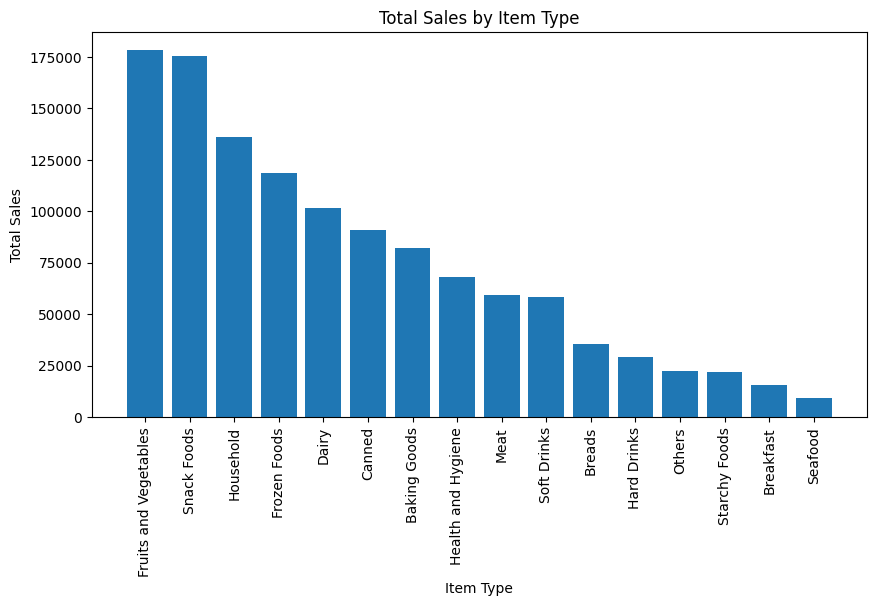

In [21]:
plt.figure(figsize=(10,5))
plt.bar(x=sales_by_type.index, height=sales_by_type.values)
plt.xticks(rotation=90)
plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.show()

**TOTAL SALES BY OUTLET TYPE**

In [22]:
sales_by_outlet_type = df.groupby('Outlet Type')['Sales'].sum().sort_values(ascending=False)
print(sales_by_outlet_type)

Outlet Type
Supermarket Type1    787549.8868
Grocery Store        151939.1470
Supermarket Type2    131477.7724
Supermarket Type3    130714.6746
Name: Sales, dtype: float64


/tmp/ipython-input-1374789763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_outlet_type.index, y=sales_by_outlet_type.values, palette='viridis')


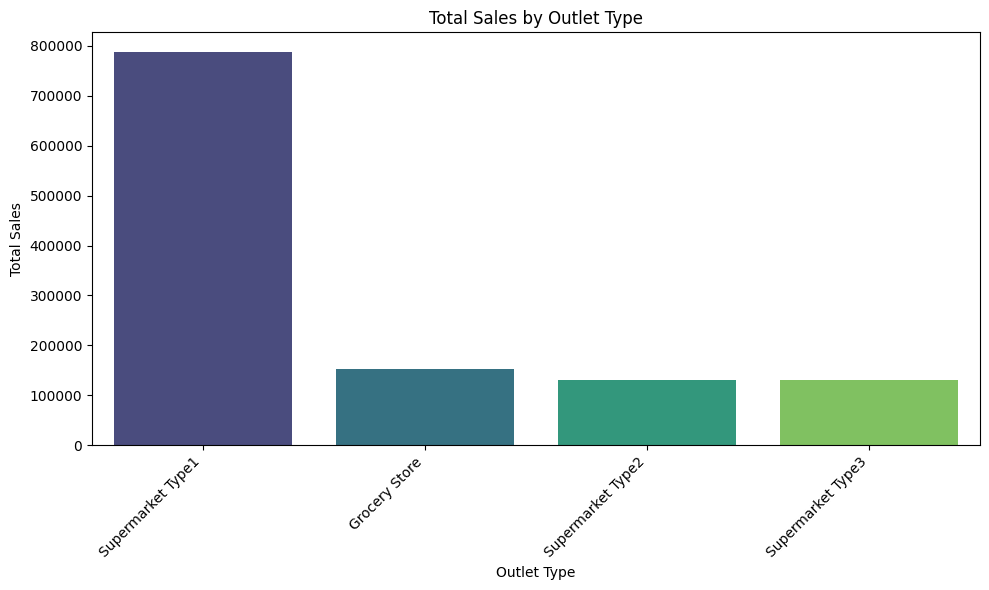

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_outlet_type.index, y=sales_by_outlet_type.values, palette='viridis')
plt.title('Total Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**FAT CONTENT BY OUTLET FOR TOTAL SALES**

In [24]:
grouped=df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped=grouped[['Regular','Low Fat']]

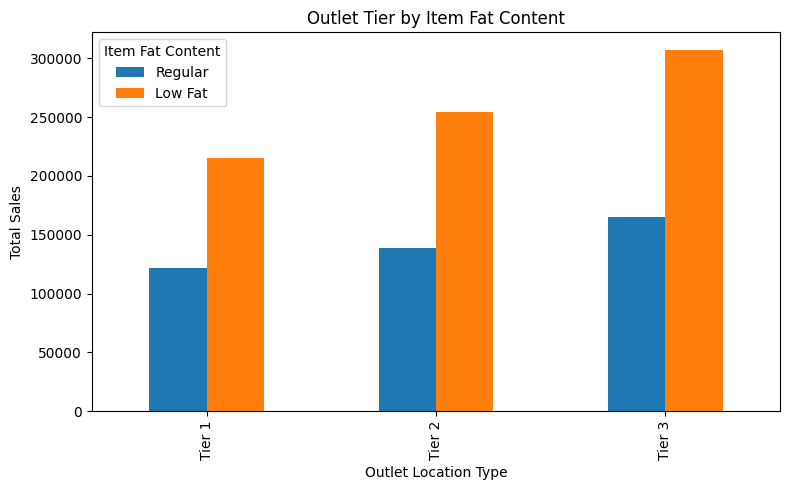

In [25]:
ax=grouped.plot(kind='bar',figsize=(8,5),title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

**TOTAL SALES BY OUTLET ESTABLISHMENT**

In [26]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [27]:
total_sales_by_establishment=df.groupby('Outlet Establishment Year')['Sales'].sum()
total_sales_by_establishment

,Sales
Outlet Establishment Year,
1998,204522.2570
2000,131809.0156
2010,132113.3698
2011,78131.5646
2012,130476.8598
2015,130942.7782
2017,133103.9070
2020,129103.9564
2022,131477.7724


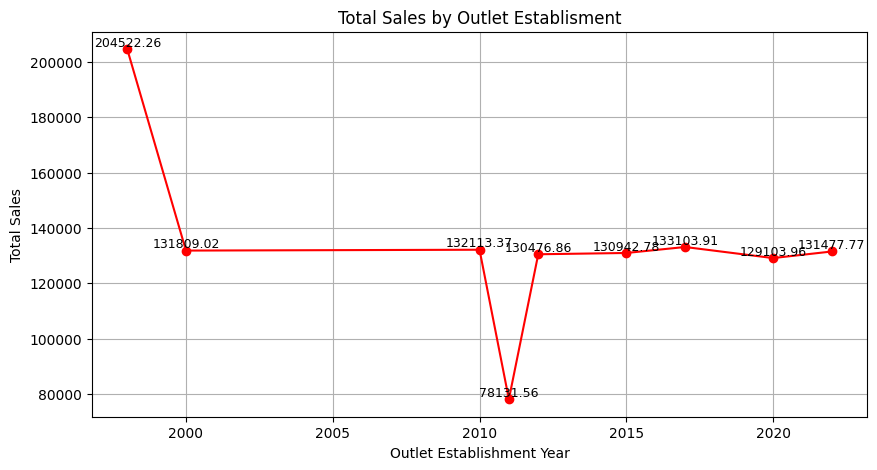

In [32]:
plt.figure(figsize=(10,5))
plt.plot(total_sales_by_establishment.index,total_sales_by_establishment.values,marker='o',linestyle='-',color='red')
plt.title('Total Sales by Outlet Establisment')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.grid()
for i,value in enumerate(total_sales_by_establishment.values):
  plt.text(total_sales_by_establishment.index[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=9)
plt.show()

**SALES BY OUTLET SIZE**

In [33]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [34]:
Sales_by_size=df.groupby('Outlet Size')['Sales'].sum()
Sales_by_size

,Sales
Outlet Size,
High,248991.5840
Medium,507895.7284
Small,444794.1684


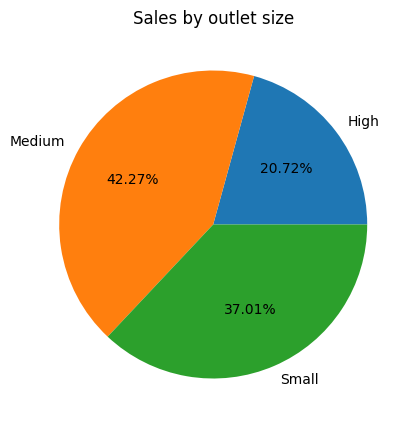

In [35]:
plt.figure(figsize=(8,5))
plt.pie(Sales_by_size,labels=Sales_by_size.index,autopct='%1.2f%%')
plt.title('Sales by outlet size')
plt.show()

**SALES BY OUTLET LOCATION**

In [36]:
df.head(1)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.1,145.4786,5.0


In [38]:
sales_by_oulet_location=df.groupby('Outlet Location Type')['Sales'].sum().sort_values(ascending=False)
sales_by_oulet_location

,Sales
Outlet Location Type,
Tier 3,472133.0272
Tier 2,393150.6416
Tier 1,336397.8120


/tmp/ipython-input-3358973890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_oulet_location.index,y=sales_by_oulet_location.values,palette='Set1')


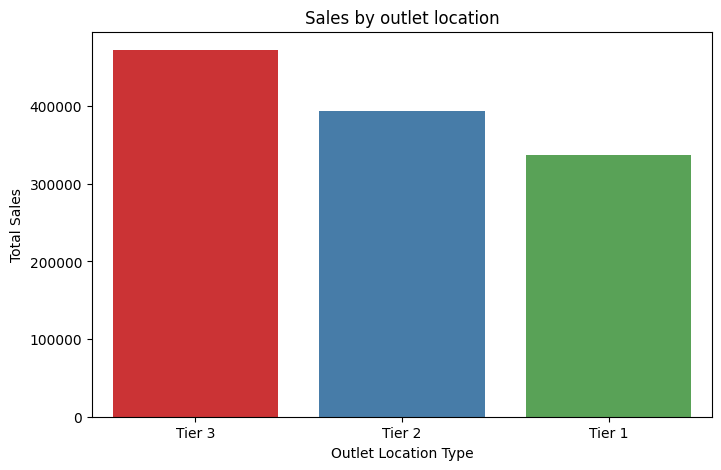

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_oulet_location.index,y=sales_by_oulet_location.values,palette='Set1')
plt.title('Sales by outlet location')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.show()
